<a href="https://colab.research.google.com/github/alexlautw9527/for_notebook/blob/main/Node2Vec_toy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install node2vec
!pip install pyvis

In [ ]:
import matplotlib.pyplot as plt
from itertools import combinations
import random


import networkx as nx

from node2vec import Node2Vec
import gensim
from gensim.models.word2vec import Word2Vec

In [ ]:
## 生成隨機graph
def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random.random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)

    return g


n = 20
p = 0.4
G = ER(n, p)


## 隨機加權重
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.randint(0,50)


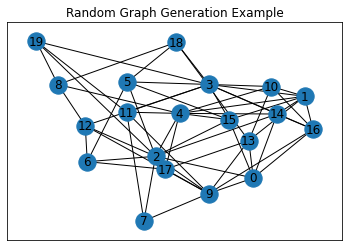

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)


plt.title("Random Graph Generation Example")
plt.show()

In [ ]:
# pyvis part
from pyvis.network import Network
from IPython.core.display import display, HTML


## 互動式視覺化
nt = Network("500px", "1000px", notebook=False)
nt.from_nx(G)
nt.show('network.html')
display(HTML('network.html'))

In [ ]:

'''
:param graph: Input graph
:param dimensions: Embedding dimensions (default: 128)
:param walk_length: Number of nodes in each walk (default: 80)
:param num_walks: Number of walks per node (default: 10)
:param p: Return hyper parameter (default: 1)
:param q: Inout parameter (default: 1)
:param weight_key: On weighted graphs, this is the key for the weight attribute (default: 'weight')
:param workers: Number of workers for parallel execution (default: 1)
:param sampling_strategy: Node specific sampling strategies, supports setting node specific 'q', 'p', 'num_walks' and 'walk_length'.
:param seed: Seed for the random number generator.
'''

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
# node2vec分成2步: 先用graph生成序列(walks), 再用序列直接套word2vec的skip-gram
# 這個套件可以end to end完成, 但我偏好先生成序列, 後續自己拿序列來train
node2vec = Node2Vec(G, dimensions=64, walk_length=20, num_walks=10, workers=8)  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
# 叫出序列
node2vec.walks[0:2]

[['14',
  '16',
  '9',
  '7',
  '11',
  '3',
  '15',
  '1',
  '15',
  '2',
  '15',
  '3',
  '5',
  '15',
  '4',
  '14',
  '16',
  '14',
  '3',
  '11'],
 ['3',
  '14',
  '16',
  '1',
  '13',
  '18',
  '3',
  '10',
  '4',
  '14',
  '3',
  '12',
  '3',
  '1',
  '10',
  '1',
  '15',
  '4',
  '17',
  '6']]

In [ ]:
# 用genism skip-gram

node_corpus = node2vec.walks
n2v_model = Word2Vec(node_corpus, size=64, iter=20, window=5, sg=1, negative=20, min_count=1, workers=16)

In [ ]:
G[1]

AtlasView({3: {'weight': 30}, 15: {'weight': 34}, 16: {'weight': 36}, 14: {'weight': 19}, 10: {'weight': 48}, 13: {'weight': 33}, 4: {'weight': 6}})

In [ ]:
# 找最近

n2v_model.wv.most_similar('1', topn=3)

[('3', 0.9983296990394592),
 ('10', 0.9980359077453613),
 ('16', 0.9957547187805176)]